In [41]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

from src.preprocessing import load_mask, get_clear_data_idxs, min_max_scaller, mean_scaller, standard_scaller, norm_scaller

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
radar_data = np.load('data/radars_2020-11-01_2022-12-31.npy')
glorys     = np.load('data/glorys_2020-11-01_2022-12-31.npy')
gfs = np.load('data/gfs_2020-11-01_2022-12-31.npy')
mask = load_mask('data/mask.png')

print('radar data : ', radar_data.shape)
print('glorys data :', glorys.shape)
print('gfs data :', gfs.shape)
print('mask data :', mask.shape)


radar data :  (791, 825, 200)
glorys data : (791, 3, 825, 200)
gfs data : (791, 3, 825, 200)
mask data : (825, 200)


In [15]:
v_min, v_max = np.min(radar_data, (1,2)), np.max(radar_data, (1,2))

In [28]:
normed_data

array([[[0.39146826, 0.37729925, 0.37378275, ..., 0.61668342,
         0.60489815, 0.67549533],
        [0.38278764, 0.37843195, 0.38033295, ..., 0.63206637,
         0.72982627, 0.6314227 ],
        [0.38057625, 0.37917846, 0.3904759 , ..., 0.72708523,
         0.73056436, 0.63737768],
        ...,
        [0.03946699, 0.03946699, 0.03946699, ..., 0.03946699,
         0.03946699, 0.03946699],
        [0.03946699, 0.03946699, 0.03946699, ..., 0.03946699,
         0.03946699, 0.03946699],
        [0.03946699, 0.03946699, 0.03946699, ..., 0.03946699,
         0.03946699, 0.03946699]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

In [11]:
np.min(radar_data, (1,2))

(791,)

In [42]:
clear_idxs = get_clear_data_idxs(radar_data, zero_th_percent = 2, mask = mask)
clear_idxs

(array([  8,   9,  11,  13,  14,  20,  21,  27,  28,  32,  33,  35,  37,
         38,  44,  45,  59,  63,  64,  68,  69,  70,  71,  73,  74,  75,
         76,  85,  86,  87,  88,  92,  93,  97,  98,  99, 100, 109, 110,
        111, 112, 116, 117, 128, 129, 133, 134, 135, 136, 140, 141, 145,
        146, 147, 148, 152, 153, 155, 157, 158, 159, 160, 164, 165, 171,
        172, 176, 177, 183, 184, 188, 189, 190, 191, 195, 196, 200, 201,
        202, 203, 207, 208, 212, 328, 332, 333, 335, 337, 338, 344, 345,
        349, 350, 351, 352, 356, 357, 361, 362, 363, 364, 368, 369, 370,
        371, 373, 374, 385, 386, 387, 388, 392, 393, 397, 398, 399, 400,
        404, 405, 409, 410, 416, 417, 423, 424, 428, 429, 440, 441, 447,
        448, 457, 458, 462, 464, 465, 469, 470, 471, 472, 476, 477, 481,
        482, 483, 484, 488, 489, 495, 496, 500, 501, 505, 506, 507, 508,
        512, 513, 517, 518, 519, 520, 524, 525, 553, 554, 555, 556, 560,
        561, 565, 566, 567, 568, 572, 573, 707, 709

In [47]:
normed_data = norm_scaller(radar_data[clear_idxs])

In [51]:
np.sum(abs(normed_data[0])**2)

0.9999999

In [37]:
np.min(normed_data)

0.0

In [38]:
np.max(normed_data)

1.0

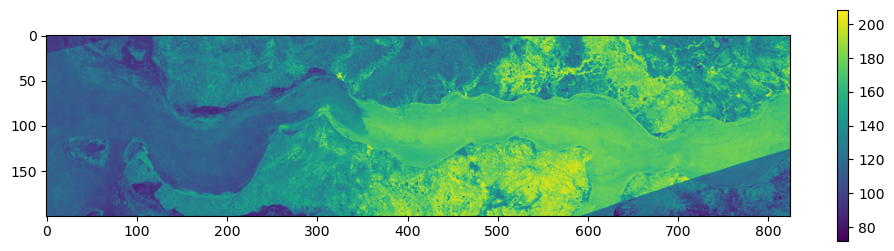

In [59]:
plt.figure(figsize=(12,3));
plt.imshow(data.sum(0).T); plt.colorbar()

In [8]:
print('radar data : ', radar_data.shape)
print('glorys data :', glorys.shape)
print('gfs data :', gfs.shape)

radar data :  (791, 825, 200)
glorys data : (791, 3, 825, 200)
gfs data : (791, 3, 825, 200)


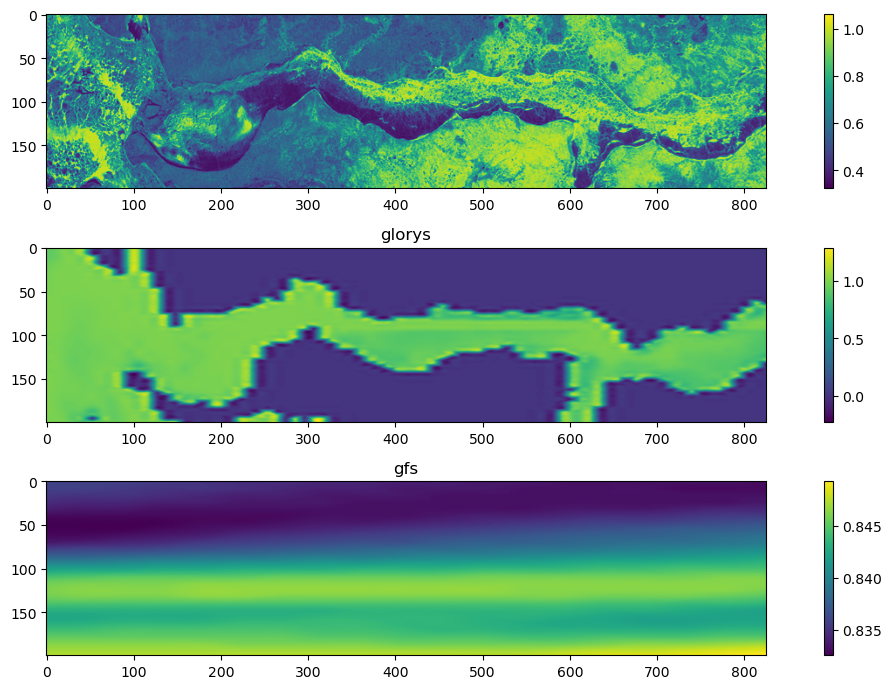

In [598]:
idx = 8
plt.figure(figsize=(12,7)); plt.subplot(3,1,1)
plt.imshow(radar_data[idx].T); plt.colorbar()
plt.subplot(3,1,2)
plt.imshow(glorys[idx,2].T); plt.title('glorys')
plt.colorbar();plt.subplot(3,1,3)
plt.imshow(gfs[idx,0].T); plt.title('gfs');plt.colorbar()
plt.tight_layout()


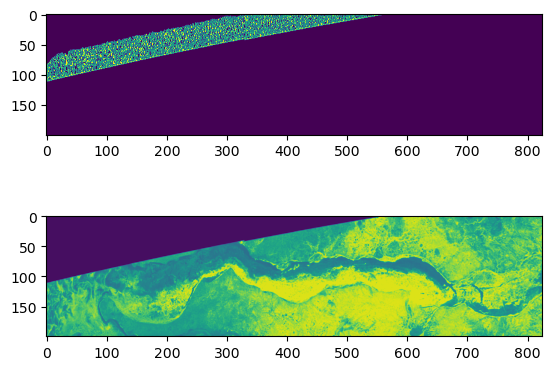

In [125]:

idx = 23
plt.subplot(2,1,2)
plt.imshow(radar_data[idx].T)
plt.subplot(2,1,1)
plt.imshow(radar_data[idx].T < 0)

In [381]:
radar_post = radar_data * (radar_data >= 0)
n_zeros = (radar_post == 0).sum(-1).sum(-1)
p_zeros = n_zeros/165000 * 100
nz_mask = p_zeros < 0.8

radar_filtered = radar_post[nz_mask,:,:]
radar_throwed = radar_post[~nz_mask,:,:]


In [601]:
%matplotlib widget

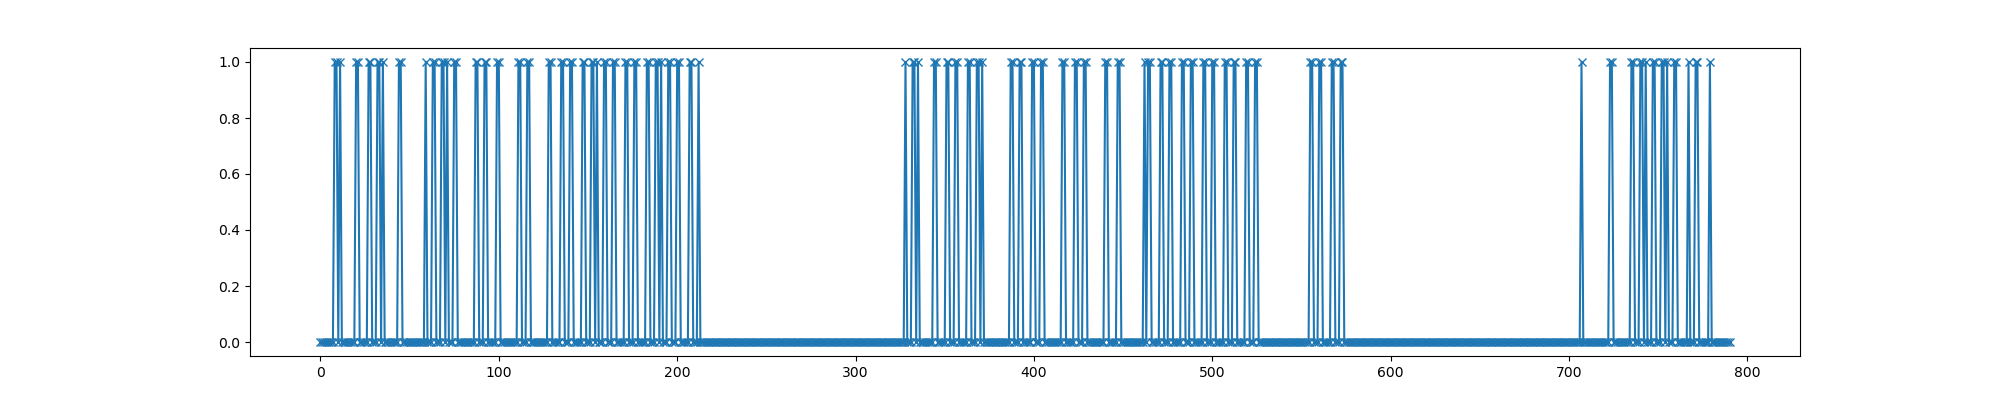

In [602]:
plt.figure(figsize =(20,4))
plt.plot(nz_mask,'x-')

In [600]:
np.where()

(array([  8,   9,  11,  20,  21,  27,  28,  32,  33,  35,  44,  45,  59,
         63,  64,  68,  69,  71,  75,  76,  87,  88,  92,  93,  99, 100,
        111, 112, 116, 117, 128, 129, 135, 136, 140, 141, 147, 148, 152,
        153, 155, 159, 160, 164, 165, 171, 172, 176, 177, 183, 184, 188,
        189, 191, 195, 196, 200, 201, 207, 208, 212, 328, 332, 333, 335,
        344, 345, 351, 352, 356, 357, 363, 364, 368, 369, 371, 387, 388,
        392, 393, 399, 400, 404, 405, 416, 417, 423, 424, 428, 429, 440,
        441, 447, 448, 462, 464, 465, 471, 472, 476, 477, 483, 484, 488,
        489, 495, 496, 500, 501, 507, 508, 512, 513, 519, 520, 524, 525,
        555, 556, 560, 561, 567, 568, 572, 573, 707, 723, 724, 735, 736,
        740, 741, 743, 747, 748, 752, 753, 755, 759, 760, 767, 771, 772,
        779]),)

In [3]:
nz_mask.shape

NameError: name 'nz_mask' is not defined

In [383]:
radar_filtered.shape

(144, 825, 200)

In [351]:
x = torch.from_numpy(radar_filtered)

In [352]:
x.shape

torch.Size([144, 825, 200])

In [353]:
X = torch.fft.fft(x,dim=0, norm = 'ortho')

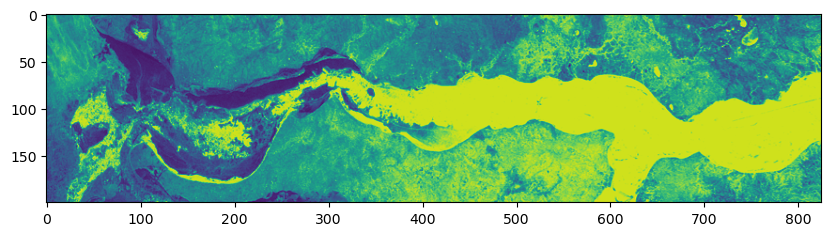

In [530]:
plt.figure(figsize=(10,3))
plt.imshow(radar_filtered[15].T)


In [375]:
U,s,V = torch.svd( x.view(144,-1))


In [476]:
%matplotlib inline

In [388]:
mask = V[:,1].view(825,200).T.abs()

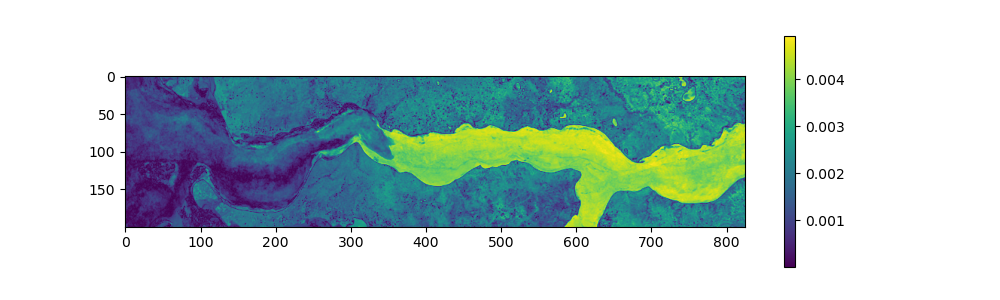

In [470]:
plt.figure(figsize=(10,3))
plt.imshow(V[:,1].view(825,200).T.abs())
plt.colorbar()

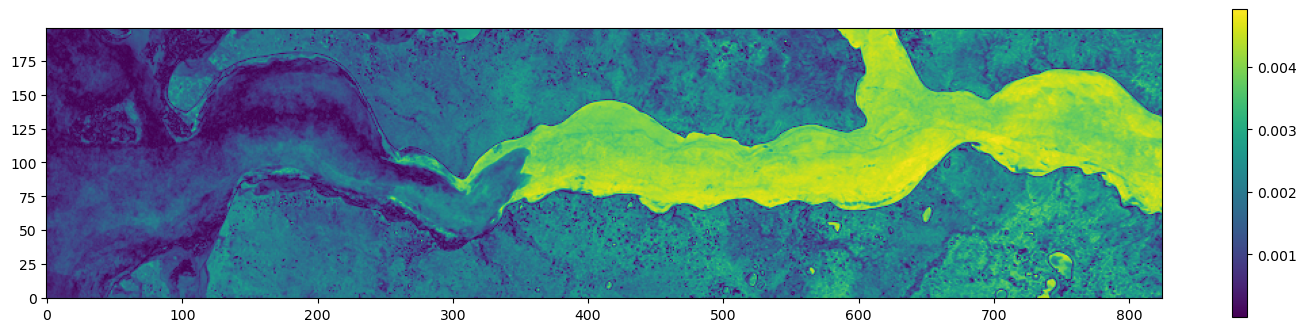

In [588]:
plt.figure(figsize=(18,4))
plt.imshow(V[:,1].view(825,200).T.abs(),origin='lower')
plt.colorbar()

In [557]:
img = V[:,1].view(825,200).T.abs()

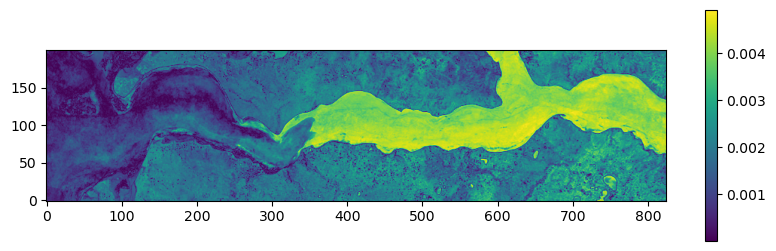

In [511]:
plt.figure(figsize=(10,3))
plt.imshow(img,origin='lower')
plt.colorbar()

In [582]:
edges2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

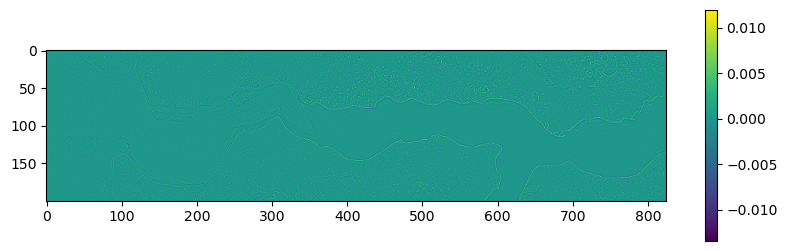

In [583]:
img_sobel = scipy.ndimage.laplace(img)
plt.figure(figsize=(10,3))
plt.imshow(img_sobel)
plt.colorbar()

In [565]:
from skimage import feature

In [403]:
G = scipy.ndimage.sobel(radar_filtered)
Gf = torch.fft.fft(torch.from_numpy(G), dim =0)

In [467]:
H = torch.abs(Gf[0:3]).sum(0)

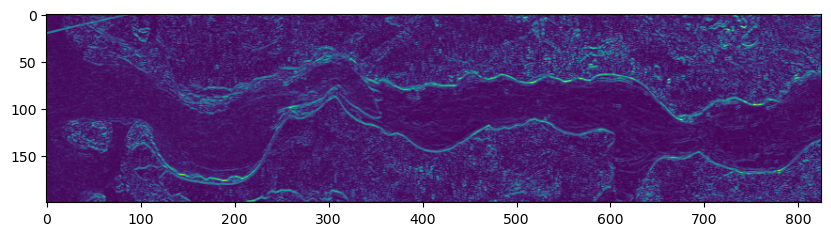

In [468]:
plt.figure(figsize=(10,3))
plt.imshow(H.T)

In [30]:
U.shape

torch.Size([791, 791])

In [42]:
T = U[0,:].view(-1,1) @ V.H[:,0].view(1,-1) * s[0]

In [35]:
V.H[:,0].shape

torch.Size([791])

In [2]:
X = torch.rand(512, 512)
U,S,V = torch.svd(X, some=False)


In [3]:
Y = U @ torch.diag(S) @ V.H

In [21]:
torch.all(torch.isclose(X,Y, atol = 1e-4))

tensor(True)

In [500]:
gf = torch.from_numpy(gfs).mean(0)

In [ ]:
glo = torch.from_numpy(glorys).mean(0)

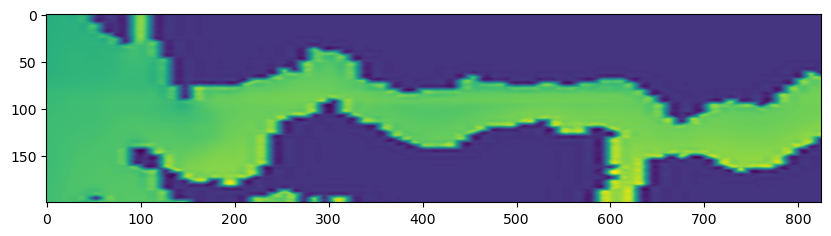

In [499]:
plt.figure(figsize=(10,3))
plt.imshow(glo[2].T)

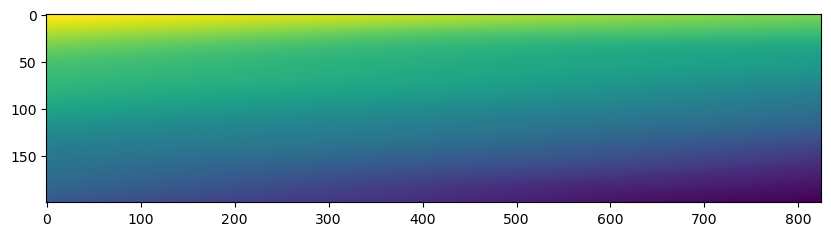

In [506]:
plt.figure(figsize=(10,3))
plt.imshow(gf[0].T)